# Gradient Descent

This notebook explores the batch gradient descent and stochastic/mini-batch gradient descent algorithms for linear regression task on real data.

In [283]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import numpy as np

In [284]:
housing = fetch_california_housing()
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [285]:
m = 5000  # Number of points to use

income = housing.data[:m, 0]
price = housing.target[:m]

In the task of linear regression we typically choose MSE as the objective function we aim to minimize:
$$
J(\theta) = \frac{1}{2} \sum_{i = 1}^{m} (\theta^T x^{(i)} - y^{(i)})^2
$$

Each partial derivative $\frac{\partial}{\partial \theta_j} J(\theta)$ of the objective function is then:
$$
\frac{\partial}{\partial \theta_j} J(\theta) = \sum_{i = 1}^{m} (\theta^T x^{(i)} - y^{(i)}) x^{(i)}_j
$$

The update rule for parameter vector $\theta$ looks like:
$$
\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) \quad (\text{for every }j = 0, \dots, n)
$$

Thus, we get:
$$
\theta_j := \theta_j - \alpha \sum_{i = 1}^{m} (\theta^T x^{(i)} - y^{(i)}) x^{(i)}_j \quad (\text{for every }j = 0, \dots, n)
$$

More compactly:
$$
\theta := \theta - \alpha X^T(X\theta - y) 
$$

Importantly, the gradient depends on the data samples, as indicated by the presence of $x^{(i)}$ and $y^{(i)}$. Using the whole data set ("batch") of $m$ elements can make the calculation in each iteration quite costly. 

For that reason, an approximation is often used, where we use just a subset of all data, or even just one element. This is known as *mini-batch gradient descent* or *stochastic gradient descent*, respectively. The subset shall be picked randomly each time.

Note that there is a trade-off: less time is spent per iteration, however since suboptimal moves are taken in each one, there likely be more iterations in total.

In [286]:
class Metadata:
	def __init__(self, path, initial_guess, convergence_delta, it, max_iter, batch_size):
		self.path = path
		self.initial_guess = initial_guess
		self.convergence_delta = convergence_delta
		self.max_iter = max_iter
		self.iter = it
		self.batch_size = batch_size

	def __str__(self):
		return f"{self.initial_guess = }\n" \
			+ f"{self.convergence_delta = }\n" \
			+ f"{self.iter = }\n" \
			+ f"{self.max_iter = }\n" \
			+ f"{self.batch_size = }"
			

def gradient_descent(X, y, learning_rate, batch_size, initial_guess = None, convergence_delta = 0.00001, max_iter = 10000):
	if initial_guess == None:
		initial_guess = np.atleast_1d(np.zeros(X[0].shape))
		initial_guess[0] = np.mean(y, axis=0)

	initial_guess = np.atleast_1d(initial_guess)
	prev_theta = initial_guess
	theta = initial_guess

	path = []
	path.append(theta)

	n_iter = 0
	while True:
		prev_theta = theta
		theta = prev_theta - learning_rate * gradient(prev_theta, X, y, batch_size)
		path.append(theta)
		n_iter += 1

		if np.sum(np.abs(prev_theta - theta)) <= convergence_delta or n_iter >= max_iter:
			break

	return theta, Metadata(np.array(path), initial_guess, convergence_delta, n_iter, max_iter, batch_size)


def gradient(theta, X, y, batch_size):
	random_indices = np.random.choice(m, size=batch_size, replace=False)
	X_subset = X[random_indices]
	y_subset = y[random_indices]

	residuals = X_subset @ theta - y_subset
	return X_subset.T @ residuals

In [342]:
X = np.ones((m, 2))
X[:, 1] = income

y = np.array(price)

learning_rate = 0.00002
batch_size = 100
max_it = 10000

theta, metadata = gradient_descent(X, y, learning_rate, m, max_iter=max_it)
theta_minibatch, metadata_minibatch = gradient_descent(X, y, learning_rate, batch_size, max_iter=max_it)

In [343]:
def prediction(x, theta):
	return theta[0] + theta[1] * x

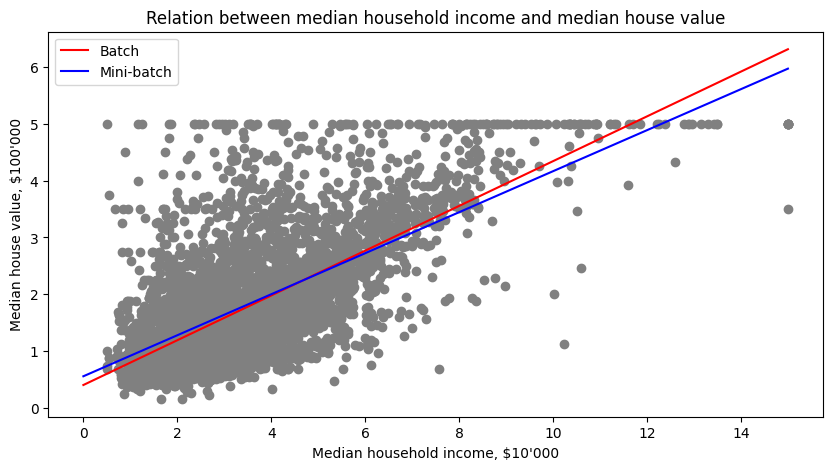

====Batch====
self.initial_guess = array([1.77071724, 0.        ])
self.convergence_delta = 1e-05
self.iter = 389
self.max_iter = 10000
self.batch_size = 5000

====Mini-batch====
self.initial_guess = array([1.77071724, 0.        ])
self.convergence_delta = 1e-05
self.iter = 5274
self.max_iter = 10000
self.batch_size = 100


In [344]:
x_vals = np.arange(np.max(income))
y_vals = prediction(x_vals, theta)
y_vals_minibatch = prediction(x_vals, theta_minibatch)

plt.scatter(income, price, color='gray')
plt.xlabel("Median household income, $10'000")
plt.ylabel("Median house value, $100'000")
plt.title("Relation between median household income and median house value")
plt.plot(x_vals, y_vals, 'r', label="Batch")
plt.plot(x_vals, y_vals_minibatch, 'b', label='Mini-batch')

plt.legend()
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

print("====Batch====")
print(metadata)
print("\n====Mini-batch====")
print(metadata_minibatch)